# Linear Regression From Scratch

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


In [64]:
class Linear_Regression:
    def __init__(self, alpha, no_of_iterations):
        self.alpha=alpha
        self.no_of_iterations=no_of_iterations

    def fit(self,x,y):
        if x.ndim == 1:
            x = x.reshape(-1, 1)  

        self.m, self.n=x.shape # training data size (n) and no of features (m)  
        self.w=np.zeros(self.n)
        self.b=0.0
        self.x=x
        self.y=y
        self.J=[]

        for i in range(self.no_of_iterations):
            self.update_weights()
            
    def update_weights(self):
        y_pred=self.predict(self.x)
        error=y_pred-self.y
        self.calculate_cost(error)
        dj_db=np.sum(error)*(1/self.m) #partial deriv of the cost function wrt the bias
        dj_dw=np.zeros(self.n)
        dj_dw=self.x.T@error *(1/self.m) # using SGD
        self.w-=(self.alpha*dj_dw)
        self.b-=(self.alpha*dj_db)
        
    
    def predict(self, x):
        if x.ndim == 1:
         x = x.reshape(-1, 1)

        return (x@self.w)+ self.b
    def score(self, y_pred, y):
        RSS = np.sum((y - y_pred) ** 2)
        TSS = np.sum((y - np.mean(y)) ** 2)
        r2 = 1 - (RSS / TSS)
        mse = np.sum((y - y_pred) ** 2) / (2 * self.m)
        return mse, r2
    def calculate_cost(self,error):
         self.J.append(np.sum((error**2))/(2*self.m))
        
        
       

## Standard Scaler

In [36]:
class StandardScaler : 
    def __init__ (self):
        self.mean = None
        self.std = None

    def fit(self,x): 
        
        if x.ndim==1:
            x=x.reshape(-1,1)
        self.mean=np.mean(x,axis=0)
        self.std=np.std(x,axis=0)
    def transform(self,x):
        return ((x-self.mean)/self.std)
    def fit_transform(self,x):
        self.fit(x)
        return self.transform(x)

## Utilizing the model

In [37]:
#some preprocessing just for trying the model: 
salary_data=pd.read_csv(r"D:\Downloads\salary_data.csv")
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [38]:
salary_data.shape

(30, 2)

In [39]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [40]:
#splitting the features and target
x=salary_data.iloc[ : , :-1].values
y=salary_data.iloc[:, -1].values


In [41]:
# train test split: 
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=2 )

In [67]:
# training the linear regression model now
model=Linear_Regression(alpha=0.01, no_of_iterations=1000)
model.fit(x_train, y_train)
y_pred_train=model.predict(x_train)
mse_train,r2_train=model.score(y_pred_train,y_train)
y_pred_test=model.predict(x_test)
mse_test,r2_test=model.score(y_pred_test,y_test)
print(f"TRAINING MSE SCORE:{mse_train} \n TRAINING R2 SCORE: {r2_train}")
print(f"TEST MSE SCORE:{mse_test} \n TEST R2 SCORE: {r2_test}")


TRAINING MSE SCORE:13990176.914716085 
 TRAINING R2 SCORE: 0.9627340388783991
TEST MSE SCORE:8676044.264969198 
 TEST R2 SCORE: 0.8623834559547073


## Visualizing the Results

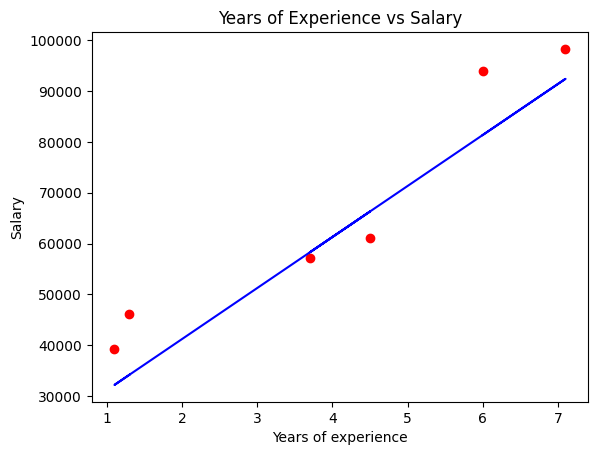

In [74]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,y_pred_test, color='blue')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.title('Years of Experience vs Salary')
plt.show()

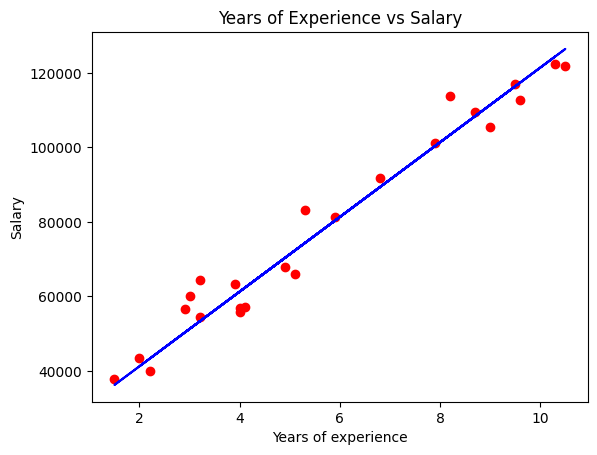

In [75]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,y_pred_train, color='blue')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.title('Years of Experience vs Salary')

plt.show()